# AirBnb

## New York City Airbnb Data 

Airbnb, Inc is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Based in San Francisco, California, the platform is accessible via website and mobile app. Airbnb does not own any of the listed properties; instead, it profits by receiving commission from each booking. The company was founded in 2008. Airbnb is a shortened version of its original name, AirBedandBreakfast.com.

## About Dataset

**Context**

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in New York City

**Content**

The following Airbnb activity is included in this New York dataset:

Listings, including full descriptions and average review score Reviews, including unique id for each reviewer and detailed comments Calendar, including listing id and the price and availability for that day

**Data Dictionary**

Data dictionaries are used to provide detailed information about the contents of a dataset or database, such as the names of measured variables, their data types or formats, and text descriptions. A data dictionary provides a concise guide to understanding and using the data.
https://docs.google.com/spreadsheets/d/1b_dvmyhb_kAJhUmv81rAxl4KcXn0Pymz

## Imports, Reading In Data, and Cleaning

In [1]:
# Standard Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading in data
df = pd.read_csv('Data/Airbnb_Open_Data.csv')
# examining shape and duplicates
print(f' Shape of DataFrame: {df.shape}\n Duplicated Rows: {df.duplicated().sum()}')
# previewing data
df.head()

/var/folders/pj/j8qg9t055bx9yt_m61ngrhyh0000gn/T/ipykernel_33567/3151957827.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/Airbnb_Open_Data.csv')


 Shape of DataFrame: (102599, 26)
 Duplicated Rows: 541


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [3]:
# First dropping 541 duplicate rows
df.drop_duplicates(inplace=True)

# snakecasing all columns
df.columns = [col.replace(' ','_').lower() for col in df.columns]

### Viewing Data Types

In [4]:
df.dtypes
# host_identify_verified and instant_bookable can likely become a binary column
# noticing there are two neighborhood groups
# price and service fee should be a float

id                                  int64
name                               object
host_id                             int64
host_identity_verified             object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country_code                       object
instant_bookable                   object
cancellation_policy                object
room_type                          object
construction_year                 float64
price                              object
service_fee                        object
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
review_rate_number                float64
calculated_host_listings_count    float64
availability_365                  

### Adjusting Data Types:
- Host Identity verified will become binary 1 represents verification, all .28% of NaN values will default to unverrified which seems reasonable given they are not confirmed to be verrified.
- instant_bookable will become binary as well, 1 represents instantly bookable, all non instant bookable including null will default to not instantly bookable.
- Price and Service Fee become floats

In [5]:
# making dummy columns
df = pd.get_dummies(df,columns=(['host_identity_verified','instant_bookable']),drop_first=True)

# df.price contains floats and strings, will make it soley a str first
df.price = df.price.astype(str) 
# removing spaces, quotations, commas, and '$'
df.price = [each.replace(' ','').replace('"','').replace(',','').strip('$') for each in df.price]
# reverting back to float
df.price = df.price.astype(float)
# df.price contains floats and strings, will make it soley a str first

df.service_fee = df.service_fee.astype(str) 
# removing spaces, quotations, commas, and '$'
df.service_fee = [each.replace(' ','').replace('"','').replace(',','').strip('$') for each in df.service_fee]
# reverting back to float
df.service_fee = df.service_fee.astype(float)

### Renaming Columns

In [6]:
df.rename(columns={'neighbourhood_group':'borough', # appropriate name
                   'host_identity_verified_verified':'verified', # simplifying
                   'instant_bookable_True':'instant_bookable', # simplifying
                   'name':'description'},inplace=True) # more appropriate
df.borough.value_counts() # two mispelled boroughs to fix

Manhattan        43557
Brooklyn         41630
Queens           13197
Bronx             2694
Staten Island      949
brookln              1
manhatan             1
Name: borough, dtype: int64

In [7]:
df.borough.replace({"brookln": "Brooklyn", "manhatan": "Manhattan"},inplace=True)

### Viewing Null Values

In [8]:
df.isnull().sum()

id                                     0
description                          250
host_id                                0
host_name                            404
borough                               29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country_code                         131
cancellation_policy                   76
room_type                              0
construction_year                    214
price                                247
service_fee                          273
minimum_nights                       400
number_of_reviews                    183
last_review                        15832
reviews_per_month                  15818
review_rate_number                   319
calculated_host_listings_count       319
availability_365                     448
house_rules                        51842
license                           102056
verified        

### First I can drop unnecessary columns
- After examining the read in error on column 25 'license', 99.9% of the column is null (102597 out of 102599 rows) so I will drop license.
- country and country_code are the same column and both depict that every listing is in the U.S. I will drop these columns because I know that every listing is in the U.S.
- last_review and reviews_per_month are redundant and contain many nulls, additionally number_of_reviews is a better indicator when viewing a listing.
- calculated_host_listings_count is similar to availability_365 that I feel comfortable removing this column
- lastly house rules contains many nulls and will be dropped.

In [9]:
df.drop(columns=['license','country','country_code','last_review',
                 'reviews_per_month','calculated_host_listings_count','house_rules'],
        inplace=True)

### Handling Null Values

In [10]:
df.shape

(102058, 19)

**First I only keep data where I am comfortable droppping nulls from specific rows**
- I didn't find a reliable way to fill these specific null values

In [11]:
df.price.isnull().sum()

247

In [12]:
df = df.loc[(df.neighbourhood.notna()) # 16 Null rows, insignificant amount of null rows
            & (df.lat.notna()) # 8 Null rows, insignificant amount of null rows
            & (df.cancellation_policy.notna()) # 74 Null rows, no way to reliably fill cancellation_policy
            & (df.description.notna()) # 245 Null rows, no reliable way to fill listing description
            & (df.availability_365.notna()) # 448 Null rows, no reliable way to fill negative days
            & (df.price.notna())] # 247 Null rows, avoiding data leakage
df.shape

(101053, 19)

In [13]:
df.describe()
# negative min on availability 365
# minimum nights has min-max values which are egregious

,id,host_id,lat,long,construction_year,price,service_fee,minimum_nights,number_of_reviews,review_rate_number,availability_365,verified,instant_bookable
count,1.010530e+05,1.010530e+05,101053.000000,101053.000000,100874.000000,101053.000000,100814.000000,100682.000000,100925.000000,100755.000000,101053.000000,101053.000000,101053.000000
mean,2.926105e+07,4.925547e+10,40.728089,-73.949657,2012.486914,625.390904,125.057641,8.067738,27.438662,3.277991,141.018842,0.498016,0.497719
std,1.625612e+07,2.853817e+10,0.055883,0.049528,5.764113,331.654560,66.330028,28.354026,49.338974,1.285113,135.411423,0.499999,0.499997
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,1.000000,-10.000000,0.000000,0.000000
25%,1.516286e+07,2.458402e+10,40.688700,-73.982580,2007.000000,340.000000,68.000000,2.000000,1.000000,2.000000,3.000000,0.000000,0.000000
50%,2.933874e+07,4.912277e+10,40.722280,-73.954450,2012.000000,625.000000,125.000000,3.000000,7.000000,3.000000,96.000000,0.000000,0.000000
75%,4.336164e+07,7.398489e+10,40.762790,-73.932350,2017.000000,913.000000,183.000000,5.000000,30.000000,4.000000,268.000000,1.000000,1.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,5.000000,3677.000000,1.000000,1.000000


### Minimum Nights
"As such, any stay that extends for 28 days or longer is regarded as a long-term or monthly stay. Not all rental listings on Airbnb offer long-term stays since it’s the host’s job to decide on whether to make their properties available for such arrangements."
https://www.mashvisor.com/blog/airbnb-monthly-stays/

In [14]:
df.minimum_nights.describe()

count    100682.000000
mean          8.067738
std          28.354026
min       -1223.000000
25%           2.000000
50%           3.000000
75%           5.000000
max        5645.000000
Name: minimum_nights, dtype: float64

In [15]:
print(f"Shape of Dataframe by dropping column: {df.drop(columns='minimum_nights').shape}") # comparing shape

print(f"Shape of Dataframe with parameters met in accordance to airbnb rules: \
{df.loc[(df.minimum_nights >= 0) & (df.minimum_nights <=28)].shape}") # comparing shape

df.drop(columns='minimum_nights',inplace=True) # dropping column

Shape of Dataframe by dropping column: (101053, 18)
Shape of Dataframe with parameters met in accordance to airbnb rules: (87002, 19)


I will drop this column despite wanting to keep it for two reasons. 
- The data dictionary to this dataset has a column called "minimum_minimum_nights" which is defined as "the smallest minimum_night value from the calender (looking 365 nights in the future)." I believe there are many errors in minimum nights because data has merged or leaked in some way from minimum minimum nights
- I keep more data overall by dropping minimum nights

## Availability
- **The Data Dictionary defines availibility_365 as the following:** "*avaliability_x. The availability of the listing x days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host.*"
- This definition does not specifiy that the listing is limited to 365 days, however when viewing days further out than 426 days there is only one listing at 3670.0. I am going to assume this is a typo and fix this to 367.
- Additionally I am going to assume that any negative number is user error where a '-' was added and correct the entry to be positive.

In [16]:
df.availability_365.replace({3677.0:367},inplace=True) # correcting error
df.availability_365 = [num*-1 if num < 0 else num for num in df.availability_365] # correcting error

### I would like to  fill in null values based on the host_id, however the data dictionary is errored
- The data dictionary states the host_id is Airbnb's unique identifier for the host/user
- There should be unique host_id or id's to represent multiple listings by the same individual
- As we can see below, this is not the case, and to prove this, I have zipped latitude and longitude as one and returned a unique number much less than the entirety of the dataset

In [17]:
print(f"The shape of the DataFrame: {df.shape}\
\nThe Unique amount of host_id's: {len(df.host_id.unique())}\
\nThe Unique amount of id's: {len(df.id.unique())}\
\nThe Unique latitude and longitude listings: {len((pd.Series(list(zip(df.lat,df.long))).unique()))}")

The shape of the DataFrame: (101053, 18)
The Unique amount of host_id's: 101053
The Unique amount of id's: 101053
The Unique latitude and longitude listings: 66481


### To fill missing values, I will group-by latitude and longitude and use forward fill and backwards fill to fill missing values on columns that I find this method appropriate.

In [18]:
# associating host_id to host_name
df['host_name'] = df.groupby(['lat','long'])['host_name'].ffill().bfill()

# grouping lat and long to fill missing construction years for associated listing 
df['construction_year'] = df.groupby(['lat','long'])[['construction_year']].ffill().bfill()

## price
# df.price = df.groupby(['neighbourhood','host_id'])['price'].ffill().bfill()

# service fee
df.service_fee = df.groupby(['lat','long'])['service_fee'].ffill().bfill()

# number of reviews
df.number_of_reviews = df.groupby(['lat','long'])['number_of_reviews'].ffill().bfill()

# review rate
df.review_rate_number = df.groupby(['lat','long'])['review_rate_number'].ffill().bfill()

# availability
df.availability_365 = df.groupby(['lat','long'])['availability_365'].ffill().bfill()

In [19]:
df.describe()

,id,host_id,lat,long,construction_year,price,service_fee,number_of_reviews,review_rate_number,availability_365,verified,instant_bookable
count,1.010530e+05,1.010530e+05,101053.000000,101053.000000,101053.000000,101053.000000,101053.000000,101053.000000,101053.000000,101053.000000,101053.000000,101053.000000
mean,2.926105e+07,4.925547e+10,40.728089,-73.949657,2012.490109,625.390904,125.050736,27.440066,3.276667,141.032062,0.498016,0.497719
std,1.625612e+07,2.853817e+10,0.055883,0.049528,5.764582,331.654560,66.333791,49.364420,1.285121,134.907604,0.499999,0.499997
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.516286e+07,2.458402e+10,40.688700,-73.982580,2008.000000,340.000000,68.000000,1.000000,2.000000,4.000000,0.000000,0.000000
50%,2.933874e+07,4.912277e+10,40.722280,-73.954450,2012.000000,625.000000,125.000000,7.000000,3.000000,96.000000,0.000000,0.000000
75%,4.336164e+07,7.398489e+10,40.762790,-73.932350,2017.000000,913.000000,183.000000,30.000000,4.000000,268.000000,1.000000,1.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,1024.000000,5.000000,426.000000,1.000000,1.000000


### Filling Missing Boroughs

In [20]:
def column_summary(column): # quick function to help me visualize issues with any column
    null = column.isnull().sum()
    rows = df.shape[0]
    null_percent = str((null/rows)*100)[:4]
    print(f"There are {null} Null rows out of {rows} rows, {null_percent}% of the column is null")
    print(f"Value Counts: \n{column.value_counts()}")

In [21]:
column_summary(df.borough)

There are 14 Null rows out of 101053 rows, 0.01% of the column is null
Value Counts: 
Manhattan        43156
Brooklyn         41212
Queens           13066
Bronx             2662
Staten Island      943
Name: borough, dtype: int64


In [22]:
df[df.borough.isnull()][['neighbourhood']].neighbourhood.unique()

array(['Clinton Hill', 'East Harlem', 'Bushwick', 'Williamsburg',
       'Harlem', 'Queens Village', 'Bedford-Stuyvesant', 'East Village',
       'Upper West Side'], dtype=object)

**Can simply create a dictionary to fill in the missing boroughs based on associated neighbourhood**

In [23]:
b_dict = { # Manhattan
          'Washington Heights':'Manhattan','East Village':'Manhattan',
          'Upper East Side':'Manhattan','Chelsea':'Manhattan',
          'East Harlem':'Manhattan','Harlem':'Manhattan',
          'Chinatown':'Manhattan','Upper West Side':'Manhattan',
           # Brooklyn
          'Clinton Hill':'Brooklyn','Williamsburg':'Brooklyn',
          'Bushwick':'Brooklyn','Prospect Heights':'Brooklyn','Bedford-Stuyvesant':'Brooklyn',
           # Queens
          'Woodside':'Queens','Queens Village':'Queens',
           # Bronx
          'Eastchester':'Bronx'
         }

df.borough = df.borough.fillna(df.neighbourhood.map(b_dict)) # filling borough with dictionary

column_summary(df.borough)

There are 0 Null rows out of 101053 rows, 0.0% of the column is null
Value Counts: 
Manhattan        43163
Brooklyn         41218
Queens           13067
Bronx             2662
Staten Island      943
Name: borough, dtype: int64


### Checking cases where the borough is in the neighbourhood name
- The value counts for if the string contains a borough should be an unique instane where the name of the neighborhood contains the borough intently. 
- The sum of value_counts should equal the sum of unique instances

#### Brooklyn

In [24]:
df[df['neighbourhood'].str.contains("Brooklyn", na=False)].neighbourhood.value_counts()

Brooklyn Heights     299
Downtown Brooklyn    174
Name: neighbourhood, dtype: int64

In [25]:
df.neighbourhood.str.contains('Brooklyn').value_counts() # 308 + 175 = 483

False    100580
True        473
Name: neighbourhood, dtype: int64

#### Bronx

In [26]:
df[df['neighbourhood'].str.contains("Bronx", na=False)].neighbourhood.value_counts()

Bronxdale    44
Name: neighbourhood, dtype: int64

In [27]:
df.neighbourhood.str.contains('Bronx').value_counts()

False    101009
True         44
Name: neighbourhood, dtype: int64

#### Queens

In [28]:
df[df['neighbourhood'].str.contains("Queens", na=False)].neighbourhood.value_counts()

Queens Village    145
Name: neighbourhood, dtype: int64

In [29]:
df.neighbourhood.str.contains('Queens').value_counts()

False    100908
True        145
Name: neighbourhood, dtype: int64

#### Manhattan and Staten Island

In [30]:
df[df['neighbourhood'].str.contains("Manhattan", na=False)].neighbourhood.value_counts()

Manhattan Beach    22
Name: neighbourhood, dtype: int64

In [31]:
df.neighbourhood.str.contains('Manhattan').value_counts()

False    101031
True         22
Name: neighbourhood, dtype: int64

In [32]:
df[df['neighbourhood'].str.contains("Bay Terrace", na=False)].neighbourhood.value_counts()

Bay Terrace                   8
Bay Terrace, Staten Island    4
Name: neighbourhood, dtype: int64

In [33]:
df[df['neighbourhood'].str.contains("Chelsea", na=False)].neighbourhood.value_counts()

Chelsea                   2245
Chelsea, Staten Island       1
Name: neighbourhood, dtype: int64

In [34]:
df[df['neighbourhood'].str.contains("Staten Island", na=False)].neighbourhood.value_counts()

Bay Terrace, Staten Island    4
Chelsea, Staten Island        1
Name: neighbourhood, dtype: int64

In [35]:
# for consistency I am keeping the associated borough next to repeating neighbourhood names
df.neighbourhood.replace({"Chelsea": "Chelsea, Manhattan", 
                          "Bay Terrace": "Bay Terrace, Queens"},inplace=True)

In [36]:
# lastly I will drop host_id and keep id to avoid redundency, 
# both are separate unique numbers for each listing 
df.drop(columns='host_id',inplace=True)

In [37]:
df.shape

(101053, 17)

In [38]:
df.isnull().sum()

id                     0
description            0
host_name              0
borough                0
neighbourhood          0
lat                    0
long                   0
cancellation_policy    0
room_type              0
construction_year      0
price                  0
service_fee            0
number_of_reviews      0
review_rate_number     0
availability_365       0
verified               0
instant_bookable       0
dtype: int64

In [39]:
df.describe()

,id,lat,long,construction_year,price,service_fee,number_of_reviews,review_rate_number,availability_365,verified,instant_bookable
count,1.010530e+05,101053.000000,101053.000000,101053.000000,101053.000000,101053.000000,101053.000000,101053.000000,101053.000000,101053.000000,101053.000000
mean,2.926105e+07,40.728089,-73.949657,2012.490109,625.390904,125.050736,27.440066,3.276667,141.032062,0.498016,0.497719
std,1.625612e+07,0.055883,0.049528,5.764582,331.654560,66.333791,49.364420,1.285121,134.907604,0.499999,0.499997
min,1.001254e+06,40.499790,-74.249840,2003.000000,50.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.516286e+07,40.688700,-73.982580,2008.000000,340.000000,68.000000,1.000000,2.000000,4.000000,0.000000,0.000000
50%,2.933874e+07,40.722280,-73.954450,2012.000000,625.000000,125.000000,7.000000,3.000000,96.000000,0.000000,0.000000
75%,4.336164e+07,40.762790,-73.932350,2017.000000,913.000000,183.000000,30.000000,4.000000,268.000000,1.000000,1.000000
max,5.736742e+07,40.916970,-73.705220,2022.000000,1200.000000,240.000000,1024.000000,5.000000,426.000000,1.000000,1.000000


In [40]:
df.to_csv('Data/cleaned_airbnb.csv',index=False)

## EDA

In [2]:
df = pd.read_csv('Data/cleaned_airbnb.csv')

In [3]:
df.head()

,id,description,host_name,borough,neighbourhood,lat,long,cancellation_policy,room_type,construction_year,price,service_fee,number_of_reviews,review_rate_number,availability_365,verified,instant_bookable
0,1001254,Clean & quiet apt home by the park,Madaline,Brooklyn,Kensington,40.64749,-73.97237,strict,Private room,2020.0,966.0,193.0,9.0,4.0,286.0,0,0
1,1002102,Skylit Midtown Castle,Jenna,Manhattan,Midtown,40.75362,-73.98377,moderate,Entire home/apt,2007.0,142.0,28.0,45.0,4.0,228.0,1,0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,Elise,Manhattan,Harlem,40.80902,-73.94190,flexible,Private room,2005.0,620.0,124.0,0.0,5.0,352.0,0,1
3,1003689,Entire Apt: Spacious Studio/Loft by central park,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,moderate,Entire home/apt,2009.0,204.0,41.0,9.0,3.0,289.0,1,0
4,1004098,Large Cozy 1 BR Apartment In Midtown East,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,flexible,Entire home/apt,2013.0,577.0,115.0,74.0,3.0,374.0,1,1


In [61]:
neighbourhood_prices = df.groupby(['borough','neighbourhood'])[['price']].mean().sort_values(
    ['borough','price'],ascending=True)

In [173]:
def plot_neighbourhood_prices(borough):
    
    target = neighbourhood_prices.copy()
    target['neighbourhood'] = [each[1] for each in target.index]
    target.set_index('neighbourhood',inplace=True)
    
    if borough.lower() == 'bronx':
        target = target[0:48]
    elif borough.lower() == 'brooklyn':
        target = target[48:96]
    elif borough.lower() == 'manhattan':
        target = target[96:128]
    elif borough.lower() == 'queens':
        target = target[128:180]
    elif borough.lower() == 'staten island':
        target = target[180:]
           
    fig, ax = plt.subplots(1,2,figsize=(16,5),tight_layout=True)
        
    ax[0].barh(target.index[-5:],target.price[-5:])
    ax[0].set_title(f"{str(borough).capitalize()}'s 5 most expensive neighbourhoods to stay",
                    fontsize=16)
    ax[0].set_xlabel('Cost of AirBnb on Average',fontsize=15)
    ax[0].tick_params(axis='both', which='major', labelsize=14)
    
    ax[1].barh(target.index[:5],target.price[:5])
    ax[1].set_title(f"{str(borough).capitalize()}'s 5 least expensive neighbourhoods to stay",
                    fontsize=16)
    ax[1].set_xlabel('Cost of AirBnb on Average',fontsize=15)
    ax[1].tick_params(axis='both', which='major', labelsize=14)

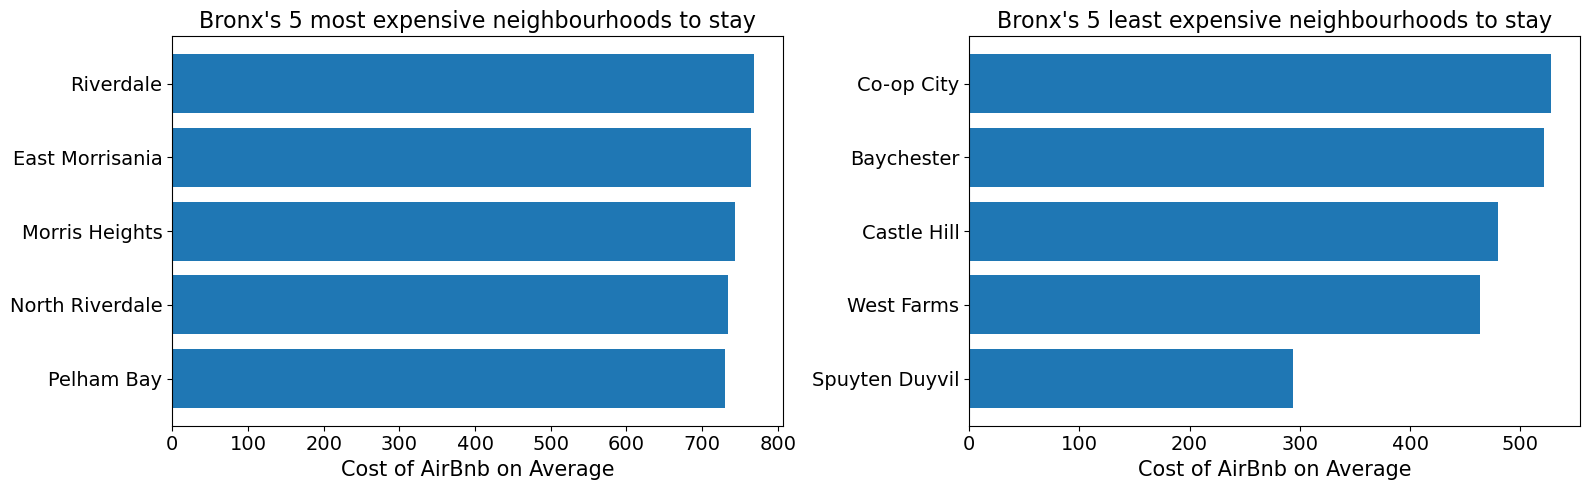

In [174]:
plot_neighbourhood_prices('bronx')

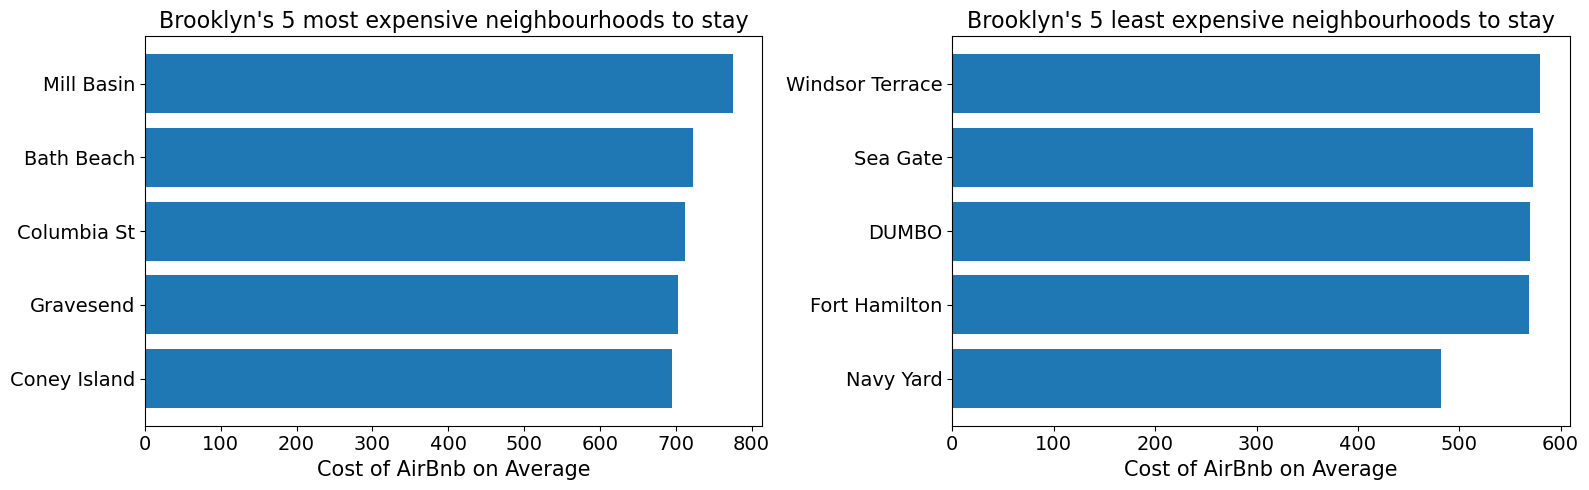

In [175]:
plot_neighbourhood_prices('brooklyn')

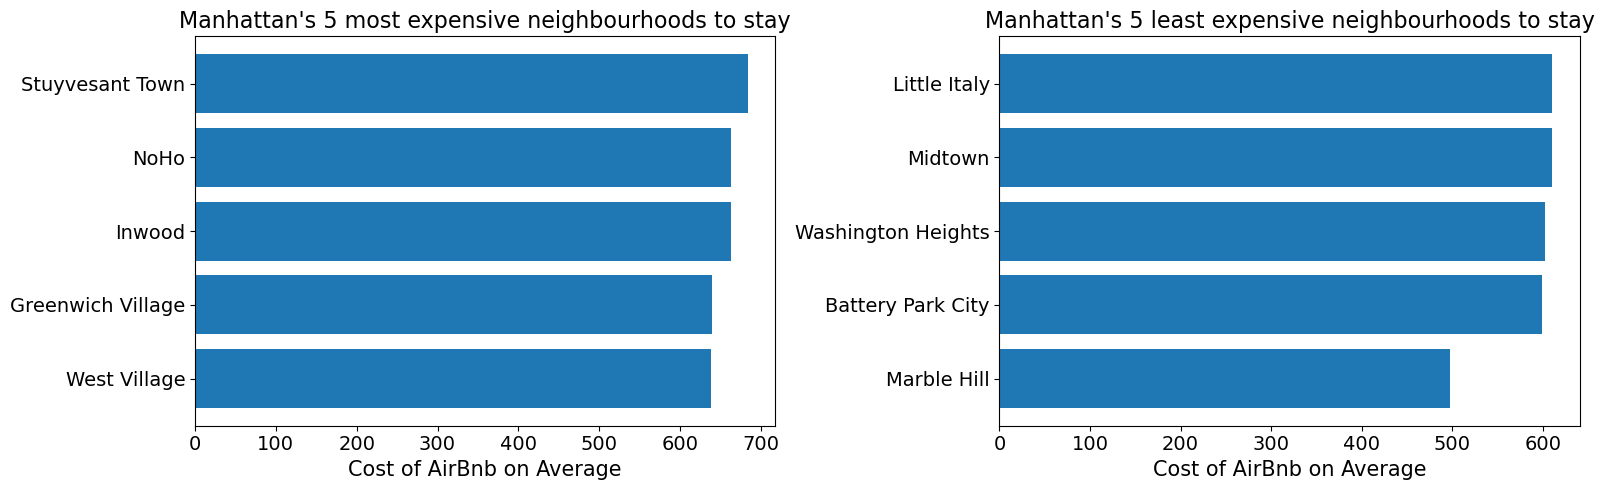

In [176]:
plot_neighbourhood_prices('manhattan')

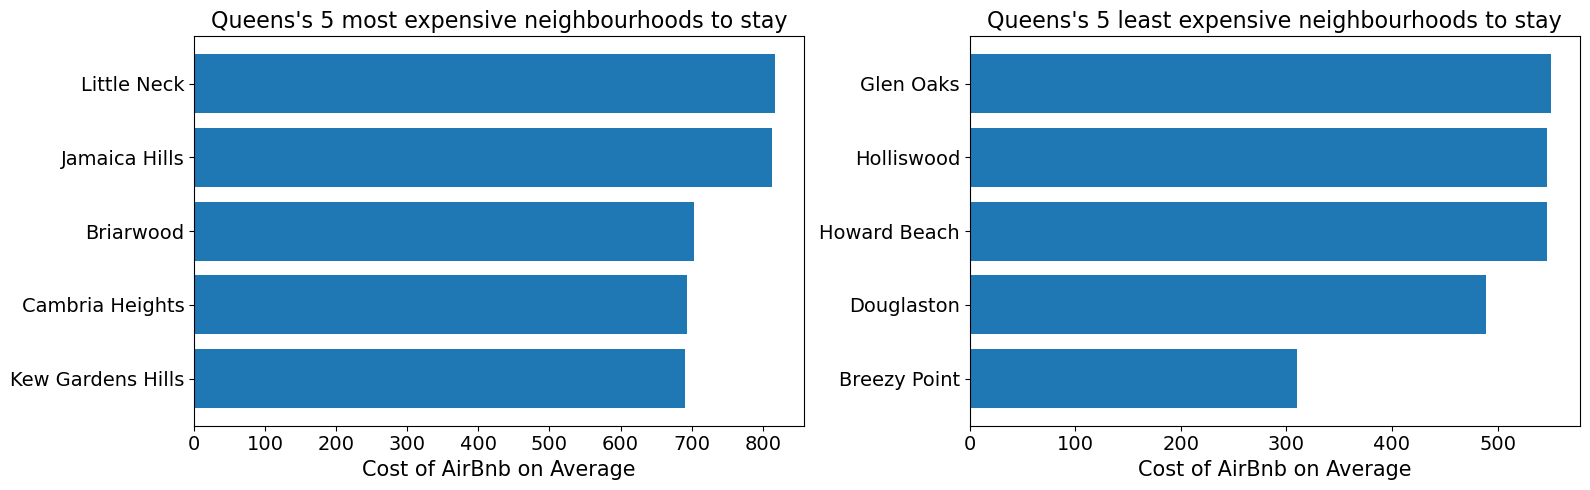

In [177]:
plot_neighbourhood_prices('queens')

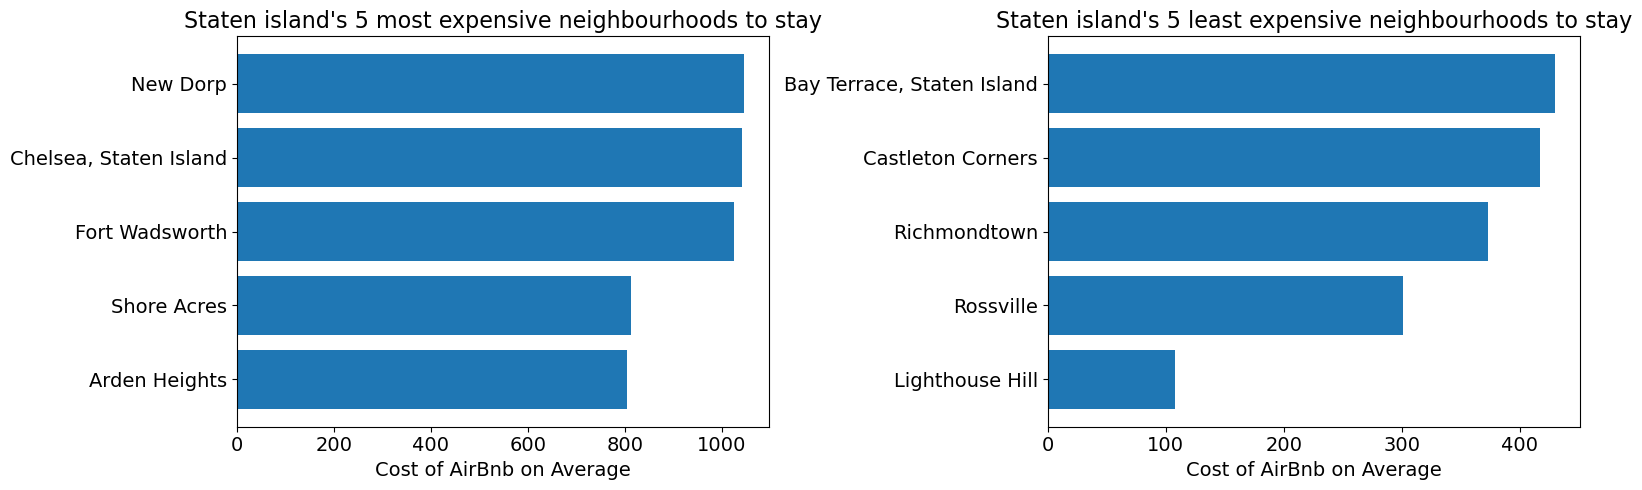

In [172]:
plot_neighbourhood_prices('staten island')

### Tableau Dashboard

In [10]:
%%html
<div class='tableauPlaceholder' id='viz1668538022678' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;NY&#47;NYCAirBnb_16685372801110&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='NYCAirBnb_16685372801110&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;NY&#47;NYCAirBnb_16685372801110&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1668538022678');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='650px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='650px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='1027px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>